# Clustering Players Based on Attributes (FIFA 20)

# 1. Overview
This document provides an in-depth analysis of the FIFA 20 dataset, which contains detailed attributes of football players. The dataset includes numerical and categorical features representing player skills, physical attributes, and market value. The primary goal is to apply multiple clustering models to group players based on their characteristics and compare their performance.

#### Objective
The objective of this project is to cluster football players based on their attributes to identify similar player profiles. This analysis will focus on:

* Data cleaning and preprocessing

* Feature selection for clustering


* Applying multiple clustering algorithms


* Evaluating and comparing cluster performance

#### Dataset Overview

* Total Players: ~18,000

* Number of Features: ~100


* Categorical Features: Player name, nationality, club, league, etc.


* Numerical Features: Age, height, weight, overall rating, skills, market value, etc.


* Missing Values: Some columns contain missing data and need imputation.



# 2.Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
fifa = pd.read_csv("players_20.csv")

In [5]:
fifa

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

# 3.Domain Analysis

Football is the most popular sport globally, with millions of players and fans. Evaluating player performance is crucial for clubs, scouts, analysts, and video game developers. FIFA 20 provides a comprehensive dataset containing detailed attributes of football players, including technical skills, physical attributes, and market value.

Clustering techniques can be used to group players based on similarities, which can help in:

* Player scouting – Identifying hidden talents with similar traits to top players.

* Team building – Finding players who complement each other in a team.

* Market analysis – Understanding player valuation trends.

* Game balancing – Creating fair and competitive teams in FIFA games.


#### Key Feature Categories
1. `Basic Information`:

Identifies the player and their club, league, and nationality.

Examples: sofifa_id, short_name, club, nationality.

2. `Physical Attributes`:

Physical aspects that influence a player's playstyle and suitability for positions.

Examples: age, height_cm, weight_kg, body_type.

3. `Overall Ratings`:

Summary ratings reflecting player ability and potential.

Examples: overall, potential, international_reputation.

4. `Market Value`:

Financial metrics that influence player transfers.

Examples: value_eur, wage_eur, release_clause_eur.


5. `Technical Skills`:

Determines a player’s ball-handling abilities.

Examples: skill_moves, weak_foot, dribbling, ball_control.


6. `Attacking Attributes`:

Key offensive metrics for forwards and attacking midfielders.

Examples: finishing, crossing, volleys, short_passing.


7. `Defensive Attributes`:

Defensive stats useful for center-backs and full-backs.

Examples: standing_tackle, sliding_tackle, defending.


8. `Goalkeeping Stats`:

Unique attributes specific to goalkeepers.

Examples: gk_diving, gk_handling, gk_positioning.


9. `Mental & Physical Stats`:

Psychological and physical attributes affecting gameplay.

Examples: vision, composure, strength, aggression.



# 4. Basic Checks

In [7]:
fifa.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [9]:
fifa.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  ...   lwb   ldm   cdm   rdm  \
18273    China PR               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2   
18274    China PR               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2   
18275    China PR         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2   
18276    China PR  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2   
18277    China PR         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2   

        rwb    lb   lcb    cb   rcb    rb  
18273  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  

[5 rows x 104 columns]

In [11]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


###### The dataset has total 104 features out of which 61 are numerical and 43 are object

In [13]:
fifa.isna().sum().sum()
# There are total 244935 null values in the dataset

244935

In [15]:
fifa.describe() 

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

# 5. EDA

####  5.1 Targeted Exploration
#### a)  Preparing a rank ordered list of top 10 countries with most players and checking which countries are producing the most footballers that play at this level.

In [17]:
top_countries=fifa["nationality"].value_counts().head(10) 
print(top_countries)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64


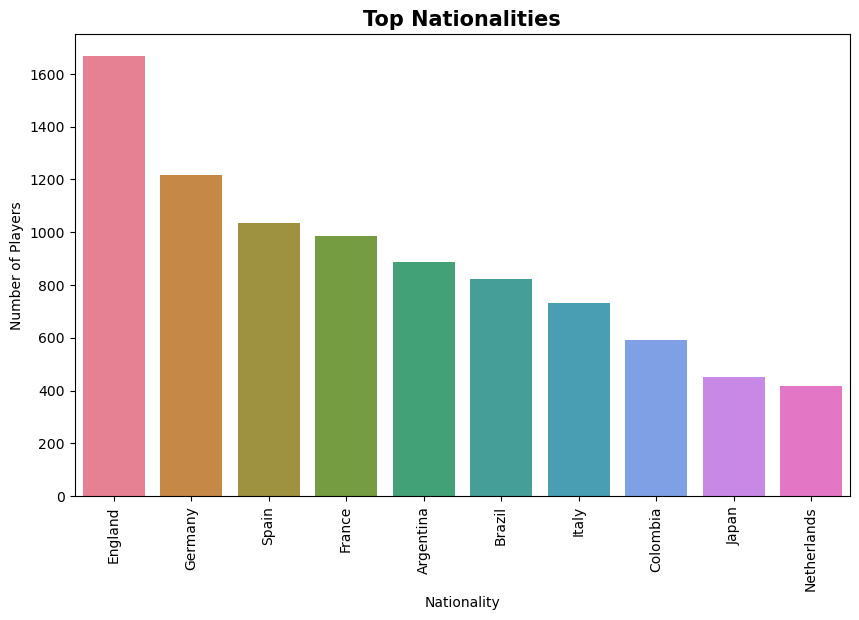

In [19]:
top_nationalities = fifa.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette=sns.color_palette("husl", len(top_nationalities)))  
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.title('Top Nationalities'.title(), fontsize=15, fontweight="bold")
plt.show()


###### The top 10 countries producing highest footballers are as above and only England,Germany,spain has managed to produce more than 1000 players

#### b) Plotting the distribution of overall rating vs age of players and checking what is the age after which a player stops improving.

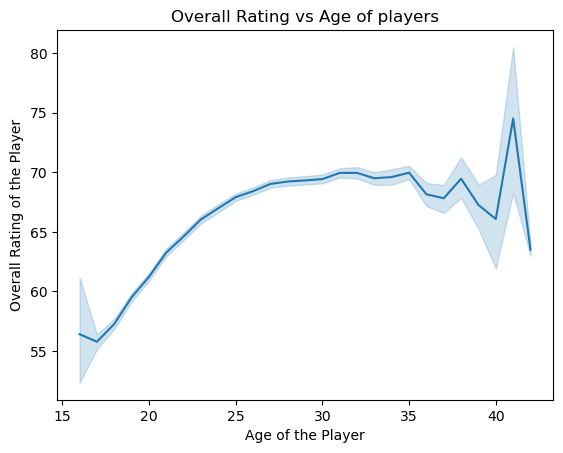

In [21]:
sns.lineplot(x="age",y="overall",data=fifa)
plt.title("Overall Rating vs Age of players")
plt.ylabel("Overall Rating of the Player")
plt.xlabel("Age of the Player")
plt.show()

###### As the lineplot suggests most players keep on improving till age 33 and then there is sudden drop in overall rating of players around 42 indicating players stop improving after age 42.

#### c) Which type of offensive players tends to get paid the most among the striker, the right-winger, or the left-winger? 

In [21]:
offensive_positions = ['ST', 'RW', 'LW']
fifa_offensive = fifa[fifa['player_positions'].apply(lambda x: any(pos in x for pos in offensive_positions))]


In [165]:

def get_primary_position(positions):
    for pos in offensive_positions:
        if pos in positions:
            return pos
    return None

In [27]:
fifa_offensive['primary_position'] = fifa_offensive['player_positions'].apply(get_primary_position)

In [29]:
fifa_offensive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4899 entries, 0 to 18261
Columns: 105 entries, sofifa_id to primary_position
dtypes: float64(16), int64(45), object(44)
memory usage: 4.0+ MB


In [163]:
avg_wages = fifa_offensive.groupby('primary_position')['wage_eur'].mean().sort_values(ascending=False)

print(avg_wages)

primary_position
LW    13157.817109
RW    12758.799172
ST    10612.288786
Name: wage_eur, dtype: float64


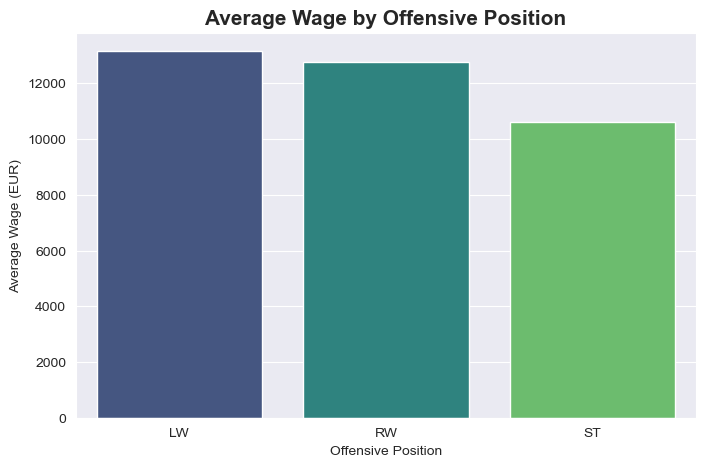

In [108]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_wages.index, y=avg_wages.values, palette="viridis")

plt.xlabel("Offensive Position")
plt.ylabel("Average Wage (EUR)")
plt.title("Average Wage by Offensive Position", fontsize=15, fontweight="bold")

plt.show()


###### Among the striker, the right-winger, and the left-winger ; the left-winger gets paid the most.

#### d) Historical comparison between Messi and Ronaldo

In [33]:
feature = fifa[['overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head(2)
compare = compare.set_index('overall')
compare.head()

potential  pace  shooting  passing  dribbling  defending  physic
overall                                                                  
94              94  87.0      92.0     92.0       96.0       39.0    66.0
93              93  90.0      93.0     82.0       89.0       35.0    78.0

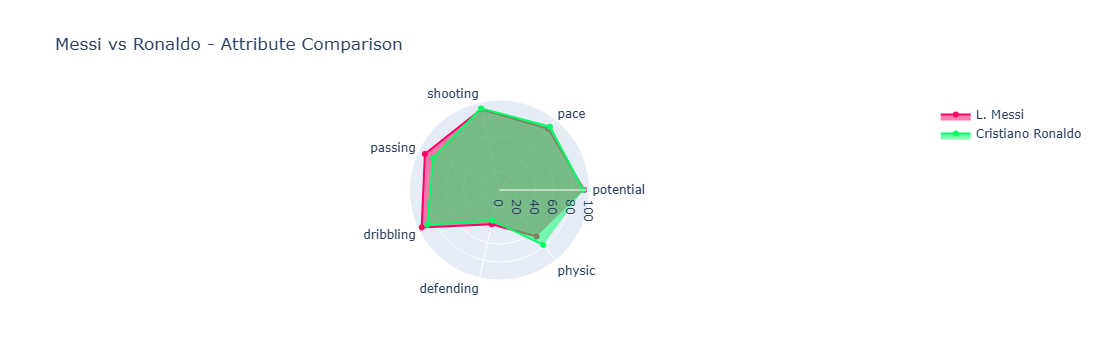

In [35]:
import plotly.graph_objects as go

players = ['L. Messi', 'Cristiano Ronaldo']
attributes = ['potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

player_data = {
    'L. Messi': compare.loc[94, attributes].values,
    'Cristiano Ronaldo': compare.loc[93, attributes].values
}

data = []
for i, player in enumerate(players):
    values = player_data[player]  
    
    data.append(go.Scatterpolar(
        r=values,
        theta=attributes,
        fill='toself',
        name=player,
        line=dict(color=f"rgba({255*(i==0)},{255*(i==1)},100,1)")
    ))


layout = go.Layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    showlegend=True,
    title="Messi vs Ronaldo - Attribute Comparison"
)


fig = go.Figure(data=data, layout=layout)
fig.show()


###### Messi's dribbling, passing, and potential skills are superior, with the scores being 96,92 and 94, respectively. However, Ronaldo has a higher shooting score of 93 compared to Messi's 92. Ronaldo also surpasses Messi in other fields, like pace and physical attributes.

#### 5.2 Univariate Analysis

`5.2.1 Distribution of Wages`

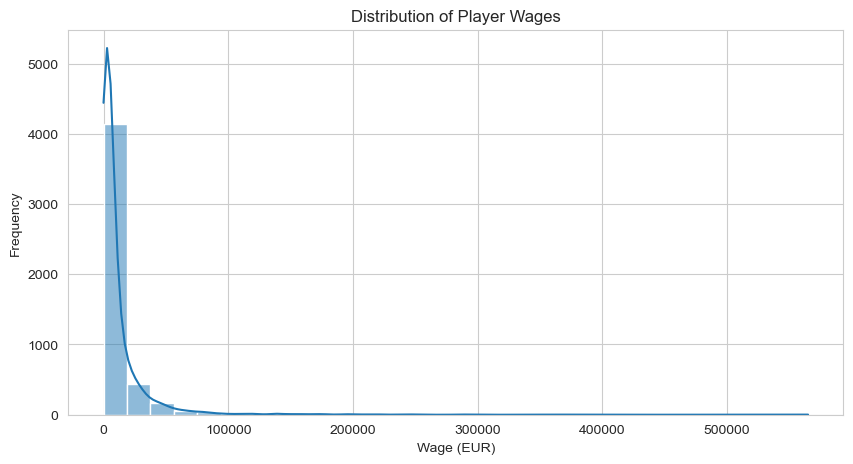

In [37]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(fifa_offensive['wage_eur'], bins=30, kde=True)
plt.xlabel("Wage (EUR)")
plt.ylabel("Frequency")
plt.title("Distribution of Player Wages")
plt.show()

###### Shows most of the players are paid lower wages and very few get high wage

`5.2.2 Distribution of Overall Ratings`

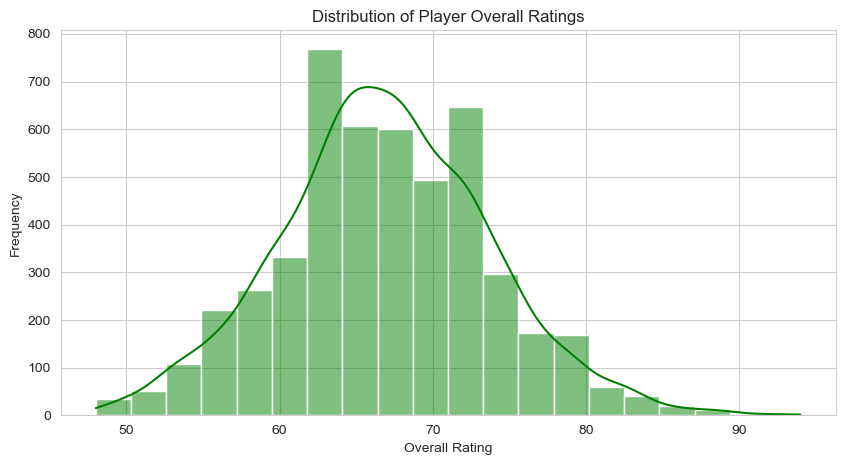

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(fifa_offensive['overall'], bins=20, kde=True, color='green')
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Player Overall Ratings")
plt.show()


###### Most common overall rating lies between 62 and 72

`5.2.3 Distribution of Age`

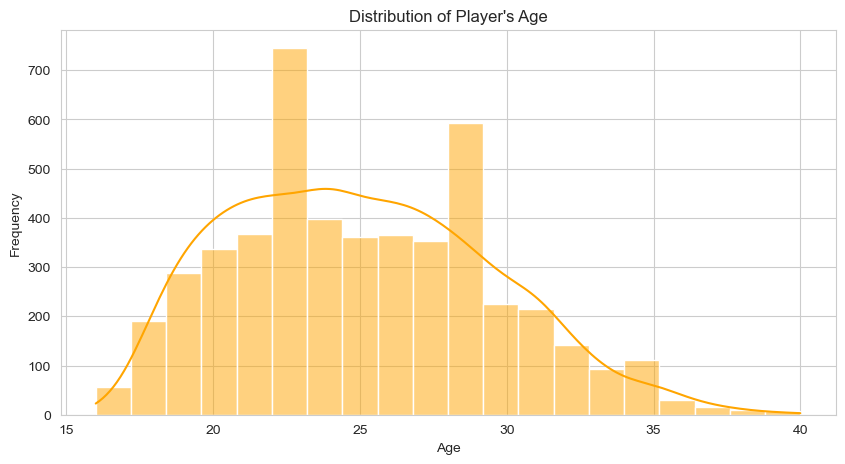

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(fifa_offensive['age'], bins=20, kde=True, color='orange')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Player's Age")
plt.show()


###### The age of most of the players lies between 22 and 29.

`5.2.4 Overall and Potential Distribution`

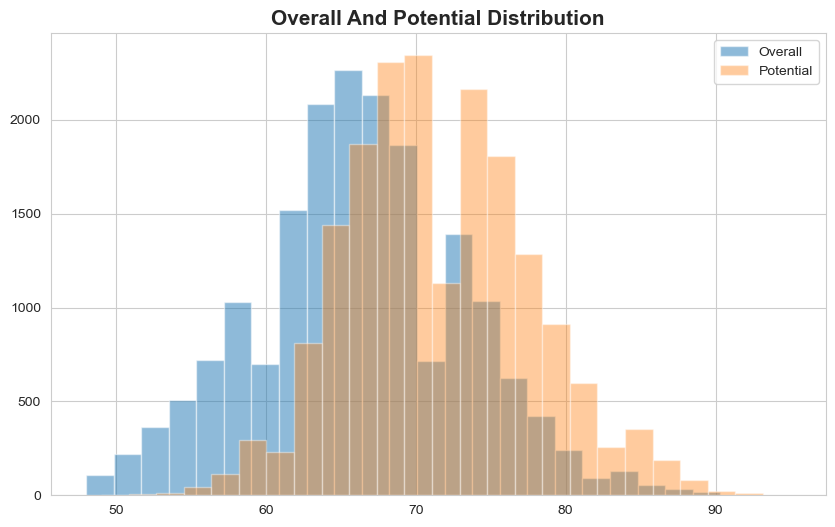

In [45]:
plt.figure(figsize=(10,6))
plt.hist(fifa['overall'], bins=25, alpha=0.5, label='Overall')
plt.hist(fifa['potential'], bins=25, alpha=0.4, label='Potential')
plt.legend()
plt.title('Overall and Potential Distribution'.title(), fontsize=15, fontweight="bold");

###### This suggests that many players are yet to reach their potential and most players have potential in between 65 to 75

#### 5.3 Bivariate Analysis

`5.3.1 Impact of Age on Movement`

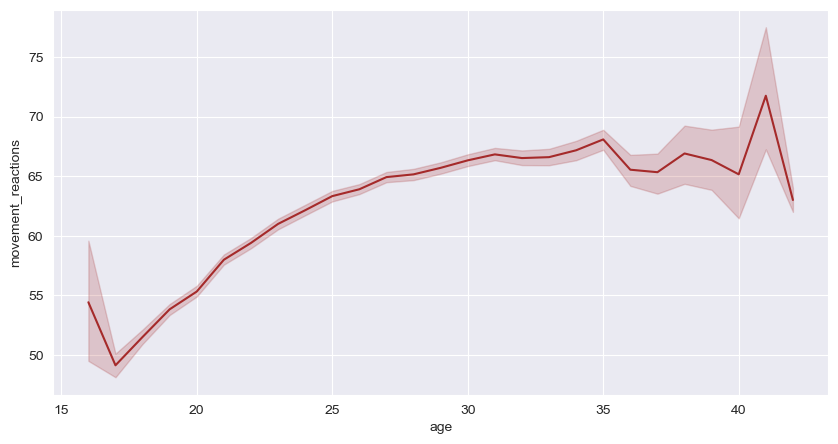

In [47]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=fifa,color='brown')
plt.show()

##### OBSERVATION:
* At the age 15 to 20 movement reaction is less.
* If player age is increasing player movement reaction also increasing but after 42 it drops.

`5.3.2 Relation between overall and potenital with respect to preferred foot`

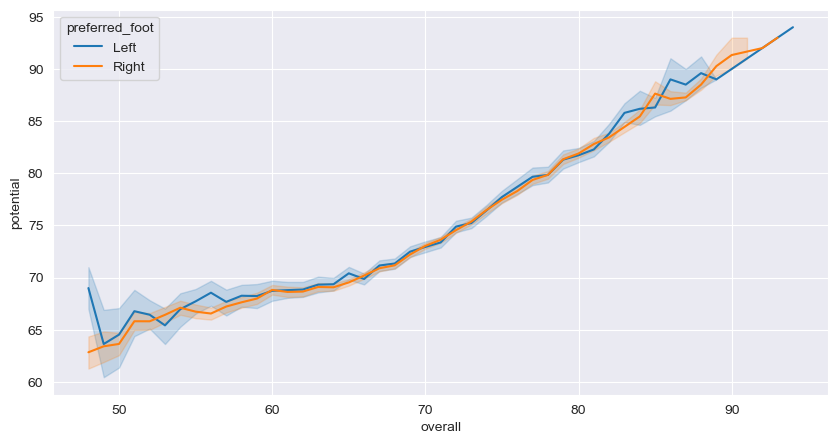

In [49]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.lineplot(x='overall',y='potential',data=fifa,color='brown',hue='preferred_foot')
plt.show()

###### If the players overall score is increasing the score of potential is also increasing with both feet.

`5.3.3 Relation between age of the player and his value`

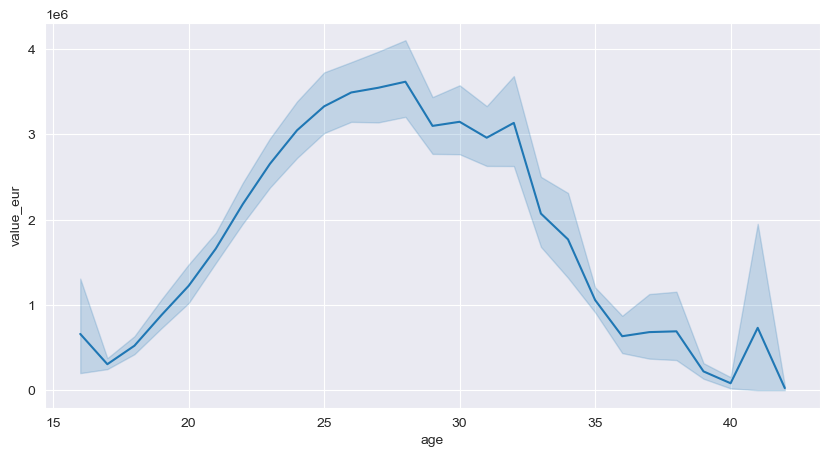

In [51]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='value_eur',data=fifa)
plt.show()

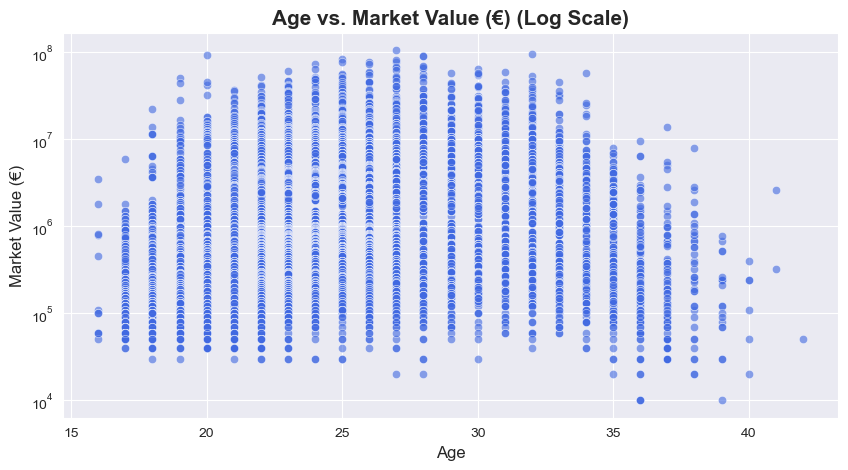

In [130]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.scatterplot(x='age', y='value_eur', data=fifa, color='royalblue', alpha=0.6)

plt.yscale("log") 
plt.xlabel("Age", fontsize=12)
plt.ylabel("Market Value (€)", fontsize=12)
plt.title("Age vs. Market Value (€) (Log Scale)", fontsize=15, fontweight="bold")

plt.show()


###### Trend shows that generally after age 33 value of player starts declining with some exception

`5.3.4 Relation between age of the player and his overall rating`

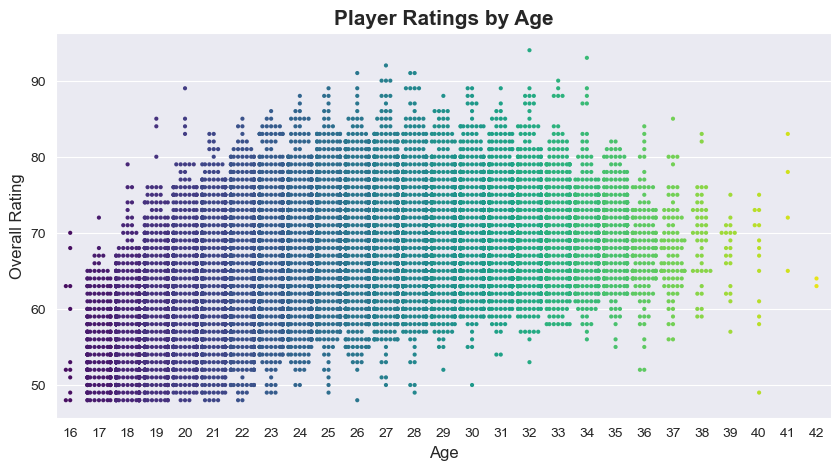

In [132]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.swarmplot(x='age', y='overall', data=fifa, palette="viridis", size=3)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Overall Rating", fontsize=12)
plt.title("Player Ratings by Age", fontsize=15, fontweight="bold")

plt.show()


###### It insuinitate that players who spent more years playing on the pitch gained more overall rating.

`5.3.5 Preferred Foot`

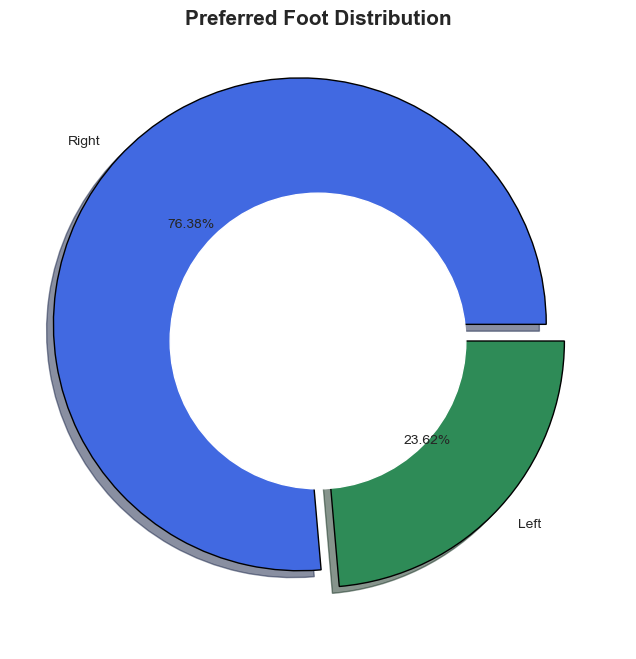

In [53]:
import matplotlib.pyplot as plt

foot = fifa.preferred_foot.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(foot, labels=foot.keys(), autopct="%.2f%%", explode=[0.1, 0], shadow=True, 
        colors=["royalblue", "seagreen"], wedgeprops={'edgecolor': 'black'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))  # Creates the donut hole

plt.title("Preferred Foot Distribution", fontsize=15, fontweight="bold")
plt.show()


#### 5.4 EDA for Categorical Features

`5.4.1 Impact of Weak overall rating on international reputation`

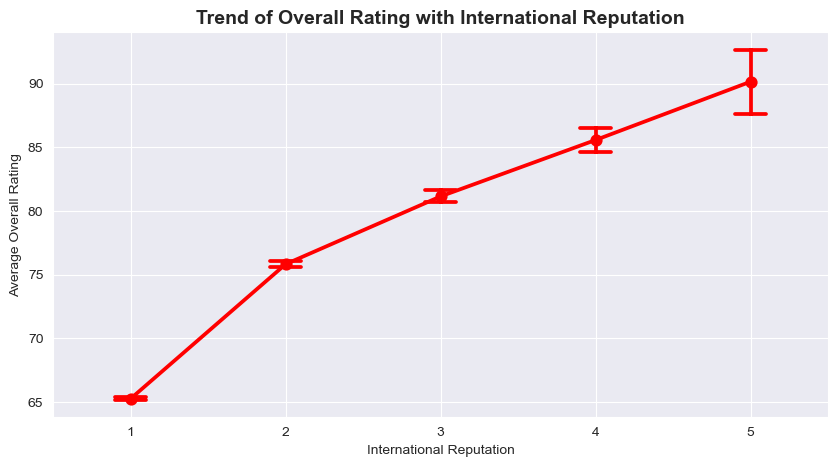

In [55]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='international_reputation', y='overall', data=fifa, capsize=0.2, color="red")

plt.xlabel("International Reputation")
plt.ylabel("Average Overall Rating")
plt.title("Trend of Overall Rating with International Reputation", fontsize=14, fontweight="bold")

plt.grid(True)
plt.show()


###### The international reputation of players increases with the increase in their overall rating.

`5.4.2 Distribution of players with respect to nationality`

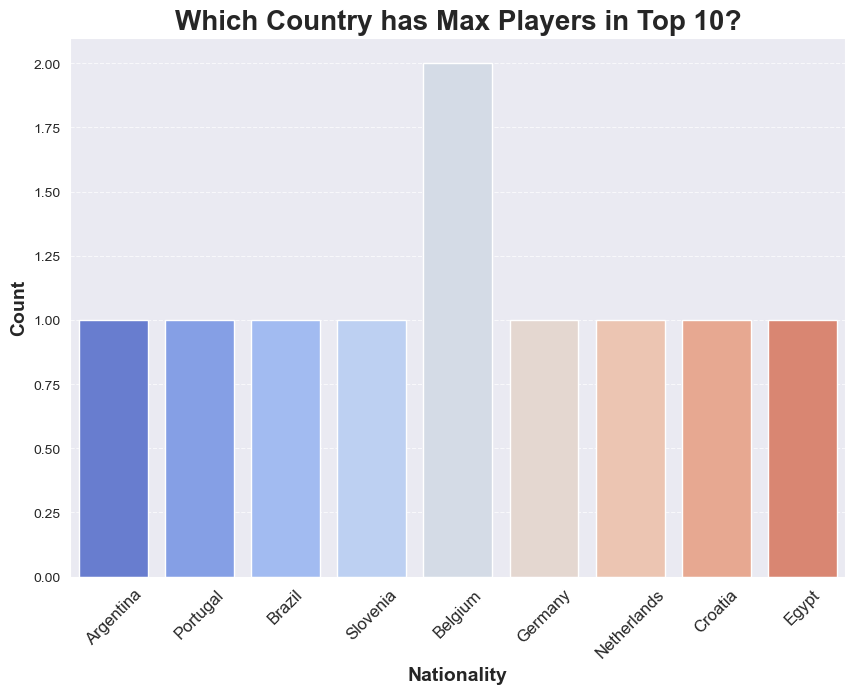

In [58]:
plt.figure(figsize=(10, 7))

colors = sns.color_palette("coolwarm", n_colors=10)

sns.countplot(x='nationality', data=fifa.head(10), palette=colors)

plt.xlabel('Nationality', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Which Country has Max Players in Top 10?', fontsize=20, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###### Belgium has the most number of players in the top 10 rankings.

`5.4.3 Which club has most players in top 10 `

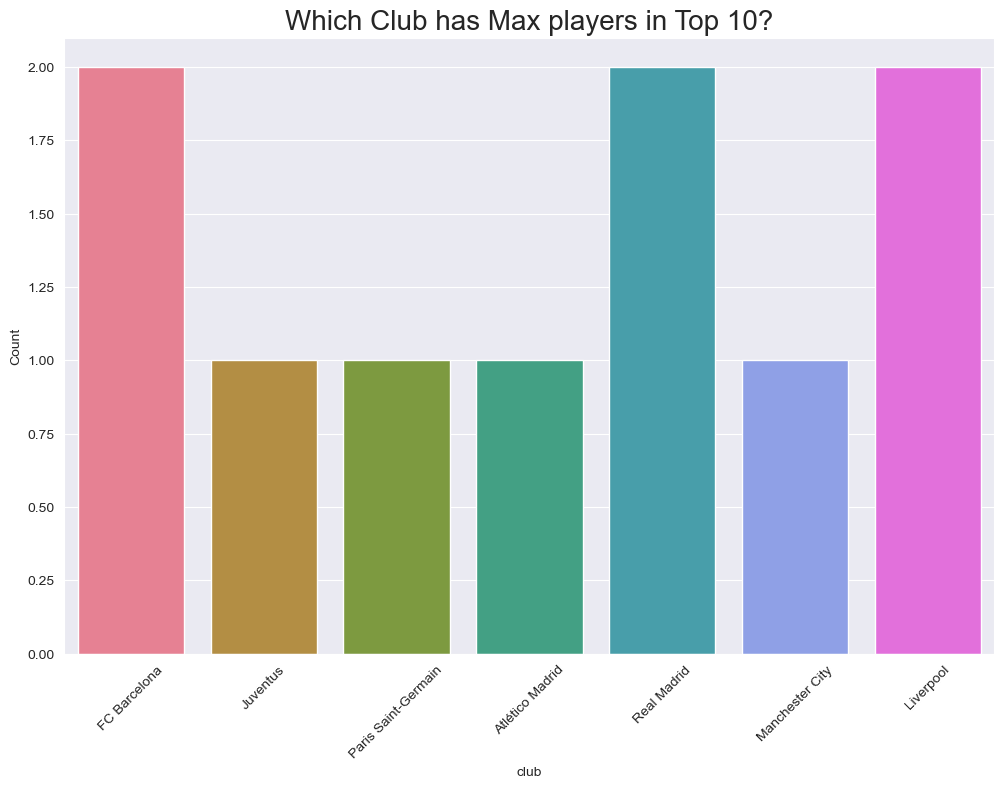

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x='club',data=fifa.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Club has Max players in Top 10?',fontsize = 20)
plt.show()


###### Barcelona, Real Madrid and Liverpool have the maximum number of players in the top 10 rankings.

# 6. Data Pre-Processing

In [65]:
pd.set_option('display.max_rows',None)
fifa.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [67]:
def missing_value(fia):
    null_value = fifa.isnull().sum()
    percentage = (fifa.isnull().sum()/fifa.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(fifa)

Missing Number  Missing Percentage
sofifa_id                                0            0.000000
player_url                               0            0.000000
short_name                               0            0.000000
long_name                                0            0.000000
age                                      0            0.000000
dob                                      0            0.000000
height_cm                                0            0.000000
weight_kg                                0            0.000000
nationality                              0            0.000000
club                                     0            0.000000
overall                                  0            0.000000
potential                                0            0.000000
value_eur                                0            0.000000
wage_eur                                 0            0.000000
player_positions                         0            0.000000
preferred_foot                           0            0.000000
international_reputation                 0            0.000000
weak_foot                                0            0.000000
skill_moves                              0            0.000000
work_rate                                0            0.000000
body_type                                0            0.000000
real_face                                0            0.000000
release_clause_eur                    1298            7.101433
player_tags                          16779           91.798884
team_position                          240            1.313054
team_jersey_number                     240            1.313054
loaned_from                          17230           94.266331
joined                                1288            7.046723
contract_valid_until                   240            1.313054
nation_position                      17152           93.839589
nation_jersey_number                 17152           93.839589
pace                                  2036           11.139074
shooting                              2036           11.139074
passing                               2036           11.139074
dribbling                             2036           11.139074
defending                             2036           11.139074
physic                                2036           11.139074
gk_diving                            16242           88.860926
gk_handling                          16242           88.860926
gk_kicking                           16242           88.860926
gk_reflexes                          16242           88.860926
gk_speed                             16242           88.860926
gk_positioning                       16242           88.860926
player_traits                        10712           58.605974
attacking_crossing                       0            0.000000
attacking_finishing                      0            0.000000
attacking_heading_accuracy               0            0.000000
attacking_short_passing                  0            0.000000
attacking_volleys                        0            0.000000
skill_dribbling                          0            0.000000
skill_curve                              0            0.000000
skill_fk_accuracy                        0            0.000000
skill_long_passing                       0            0.000000
skill_ball_control                       0            0.000000
movement_acceleration                    0            0.000000
movement_sprint_speed                    0            0.000000
movement_agility                         0            0.000000
movement_reactions                       0            0.000000
movement_balance                         0            0.000000
power_shot_power                         0            0.000000
power_jumping                            0            0.000000
power_stamina                            0            0.000000
power_strength                           0            0.000

##### 11 Features has more than 50% to 90% missing value and some unique feature also contain missing value so we drop these feature.Remaining feature missing value is less than 15% so we impute the missing value.

#### 6.1 Imputing missing values for numerical features

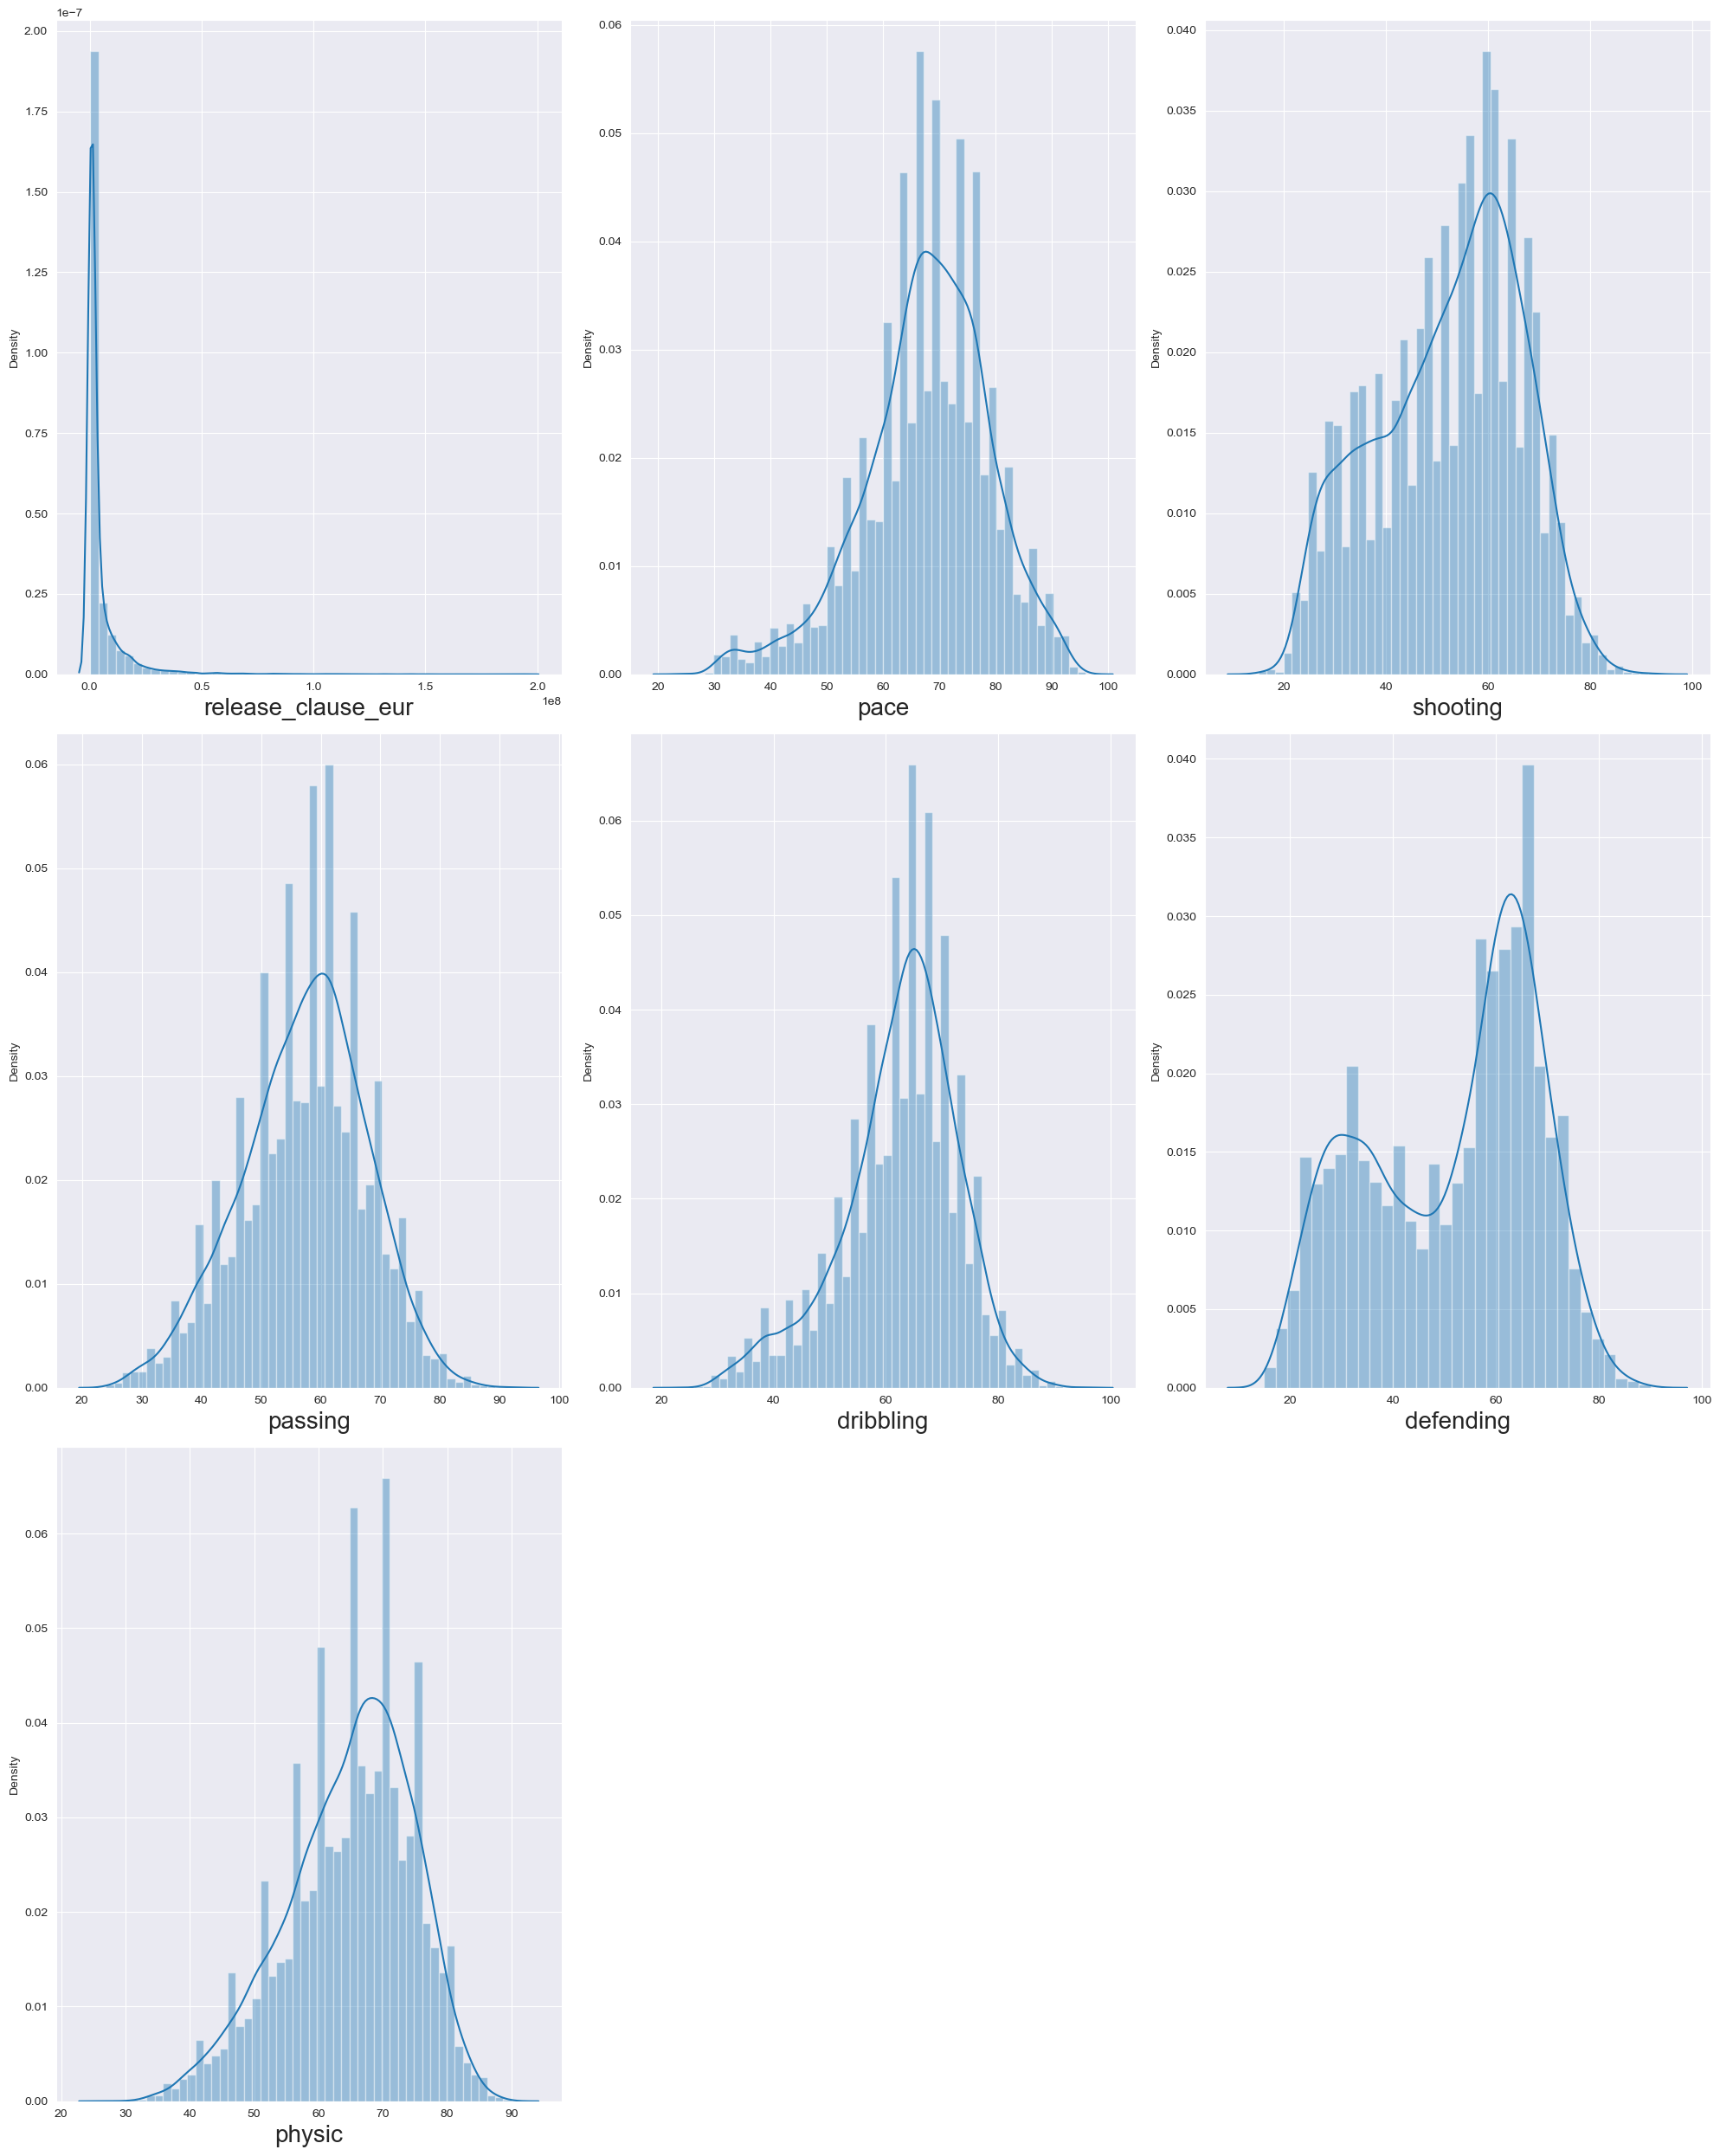

In [69]:
dist = fifa[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in dist: 
    if plotno<=8:   
        plt.subplot(3,3,plotno) 
        sns.distplot(x=dist[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 


In [71]:
# Impute missing value using median because distribution is not normal
fifa.loc[fifa['release_clause_eur'].isnull()==True,'release_clause_eur']=fifa['release_clause_eur'].median()
fifa.loc[fifa['pace'].isnull()==True,'pace']=fifa['pace'].median()
fifa.loc[fifa['shooting'].isnull()==True,'shooting']=fifa['shooting'].median()
fifa.loc[fifa['passing'].isnull()==True,'passing']=fifa['passing'].median()
fifa.loc[fifa['dribbling'].isnull()==True,'dribbling']=fifa['dribbling'].median()
fifa.loc[fifa['defending'].isnull()==True,'defending']=fifa['defending'].median()
fifa.loc[fifa['physic'].isnull()==True,'physic']=fifa['physic'].median()


In [73]:
# Check missing value after imputation
print('release_clause_eur:',fifa['release_clause_eur'].isnull().sum())
print('pace:',fifa['pace'].isnull().sum())
print('shooting:',fifa['shooting'].isnull().sum())
print('passing:',fifa['passing'].isnull().sum())
print('dribbling:',fifa['dribbling'].isnull().sum())
print('defending:',fifa['defending'].isnull().sum())
print('physic:',fifa['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


#### 6.2 Imputing missing values for categorical features

In [75]:
# Get the value counts
fifa.team_position.value_counts().head()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: count, dtype: int64

In [77]:
# Impute categorical data using mode(most freqent)
fifa['team_position'] = fifa['team_position'].replace(np.nan,'SUB')

In [79]:
fifa['team_position'].isnull().sum()

0

#### 6.3 Handling Categorical data

In [82]:
# right is assign with 1 because of majority and most frequent
# left is assign with 0 because of less no
fifa.preferred_foot = fifa.preferred_foot.map({'Right':1,'Left':0})

In [84]:
# Use mannual encoding because lots of labels avialble
fifa.team_position = fifa.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

#### 6.4 Outlier Treatment

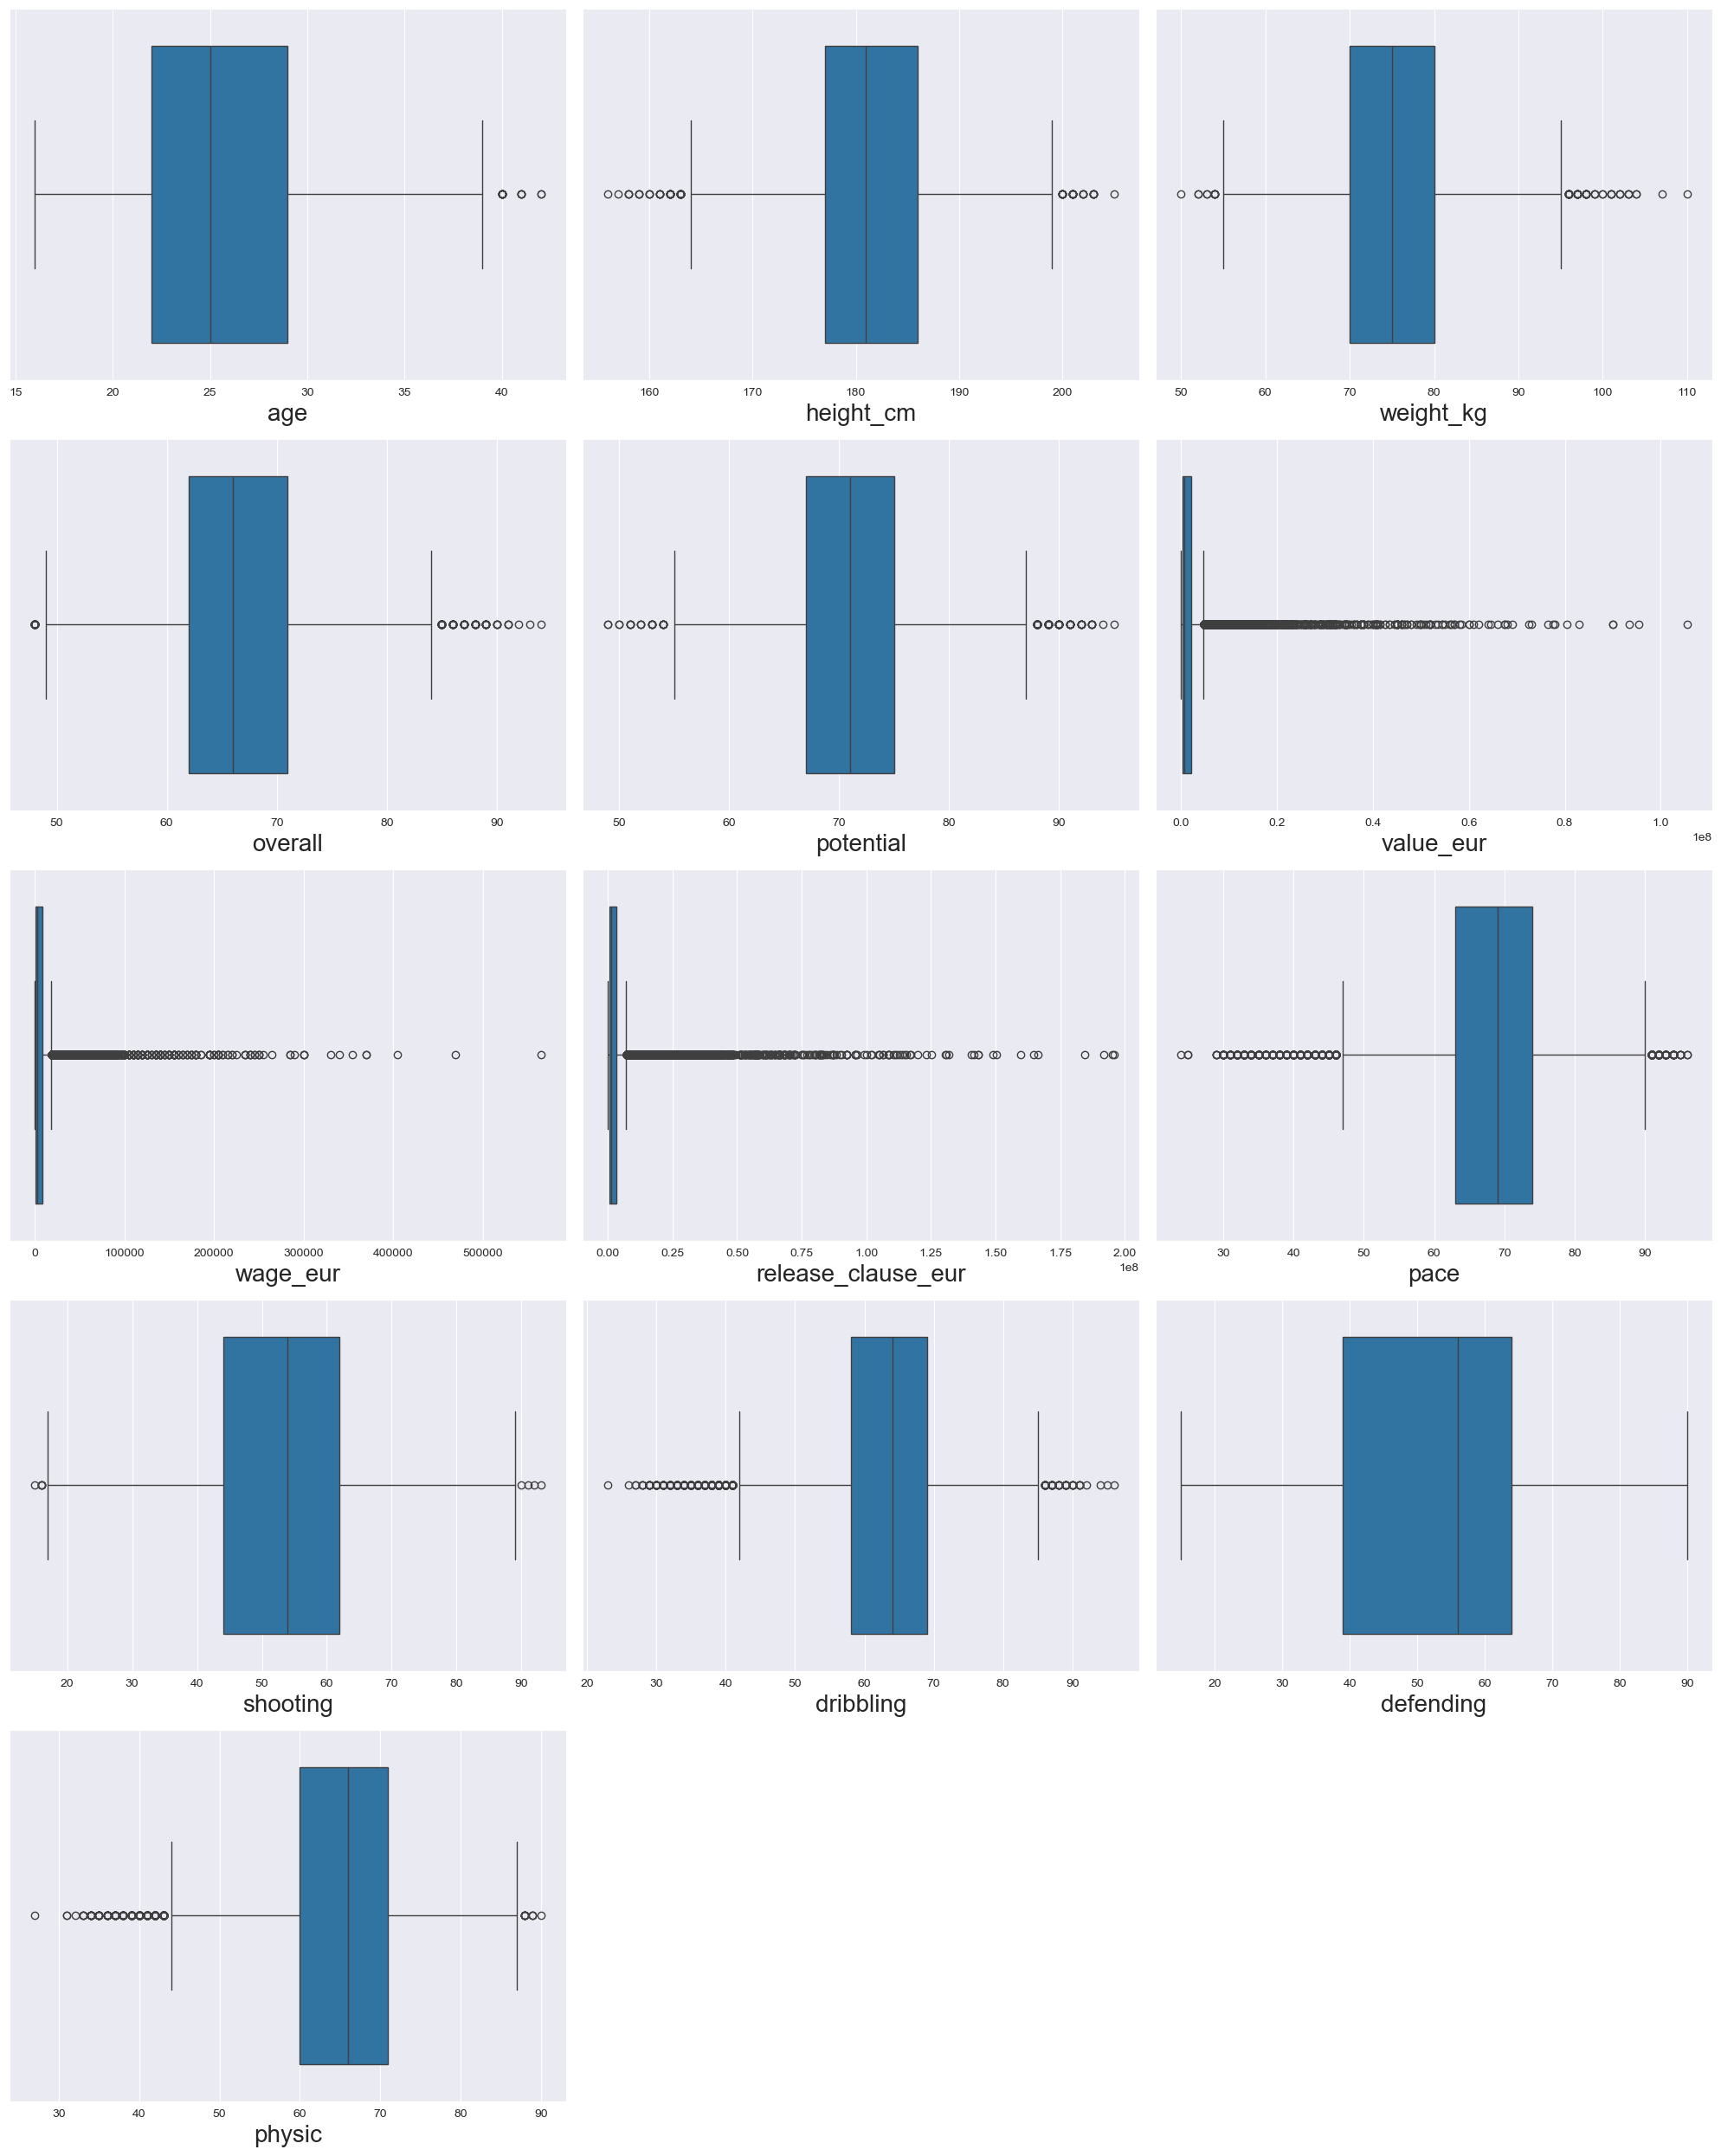

In [90]:
out = fifa[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=16:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction



In [92]:
selected_features = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']  


for feature in selected_features:
    Q1 = fifa[feature].quantile(0.25)
    Q3 = fifa[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    median_val=fifa[feature].median()

    fifa[feature]= fifa[feature].apply(lambda x: median_val if (x < lower_bound or x > upper_bound) else x)

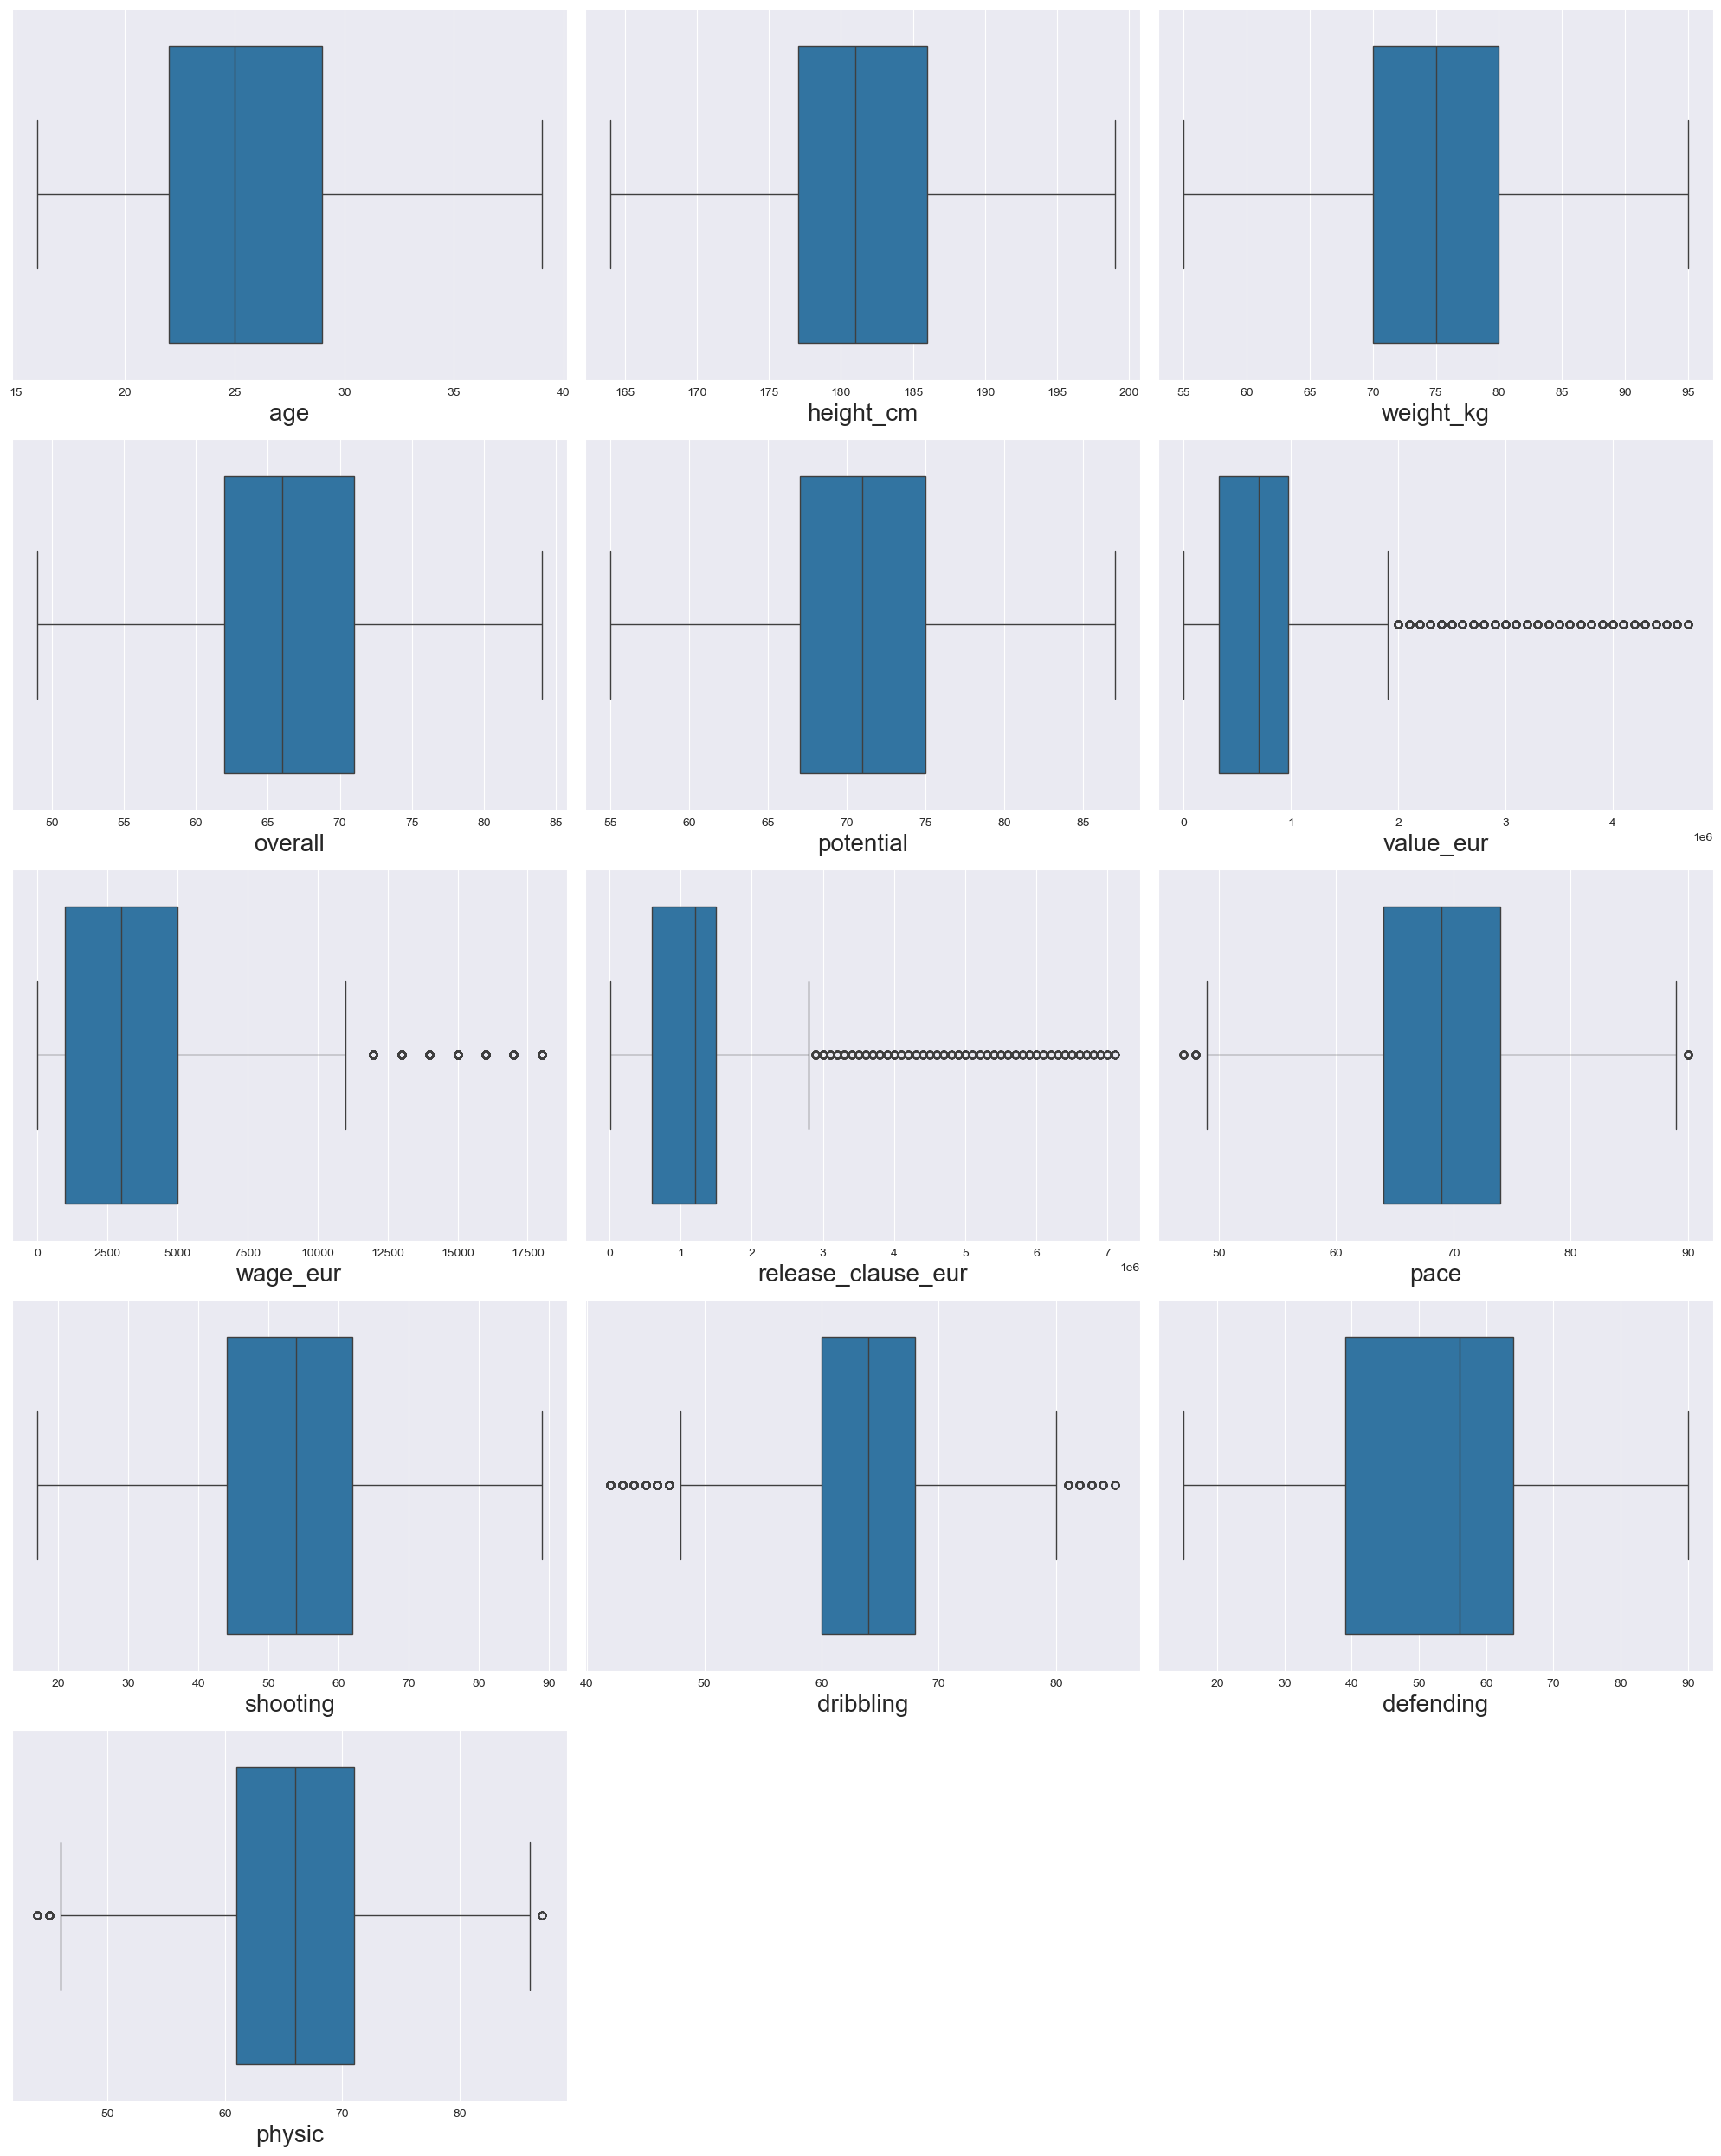

In [94]:
out = fifa[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=16:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction



#### 6.5 Feature Scaling

In [96]:
# Scale only continous features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
fifa[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(fifa[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

#### 6.6 Feature Selection
Dropping irrelevant features and highly corelated columns

In [98]:
# Drop column
fifa.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [110]:
fifa.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.083876   0.235188  0.462543   
height_cm                   0.083876   1.000000   0.750998  0.039028   
weight_kg                   0.235188   0.750998   1.000000  0.149500   
overall                     0.462543   0.039028   0.149500  1.000000   
potential                  -0.266150  -0.007210  -0.019018  0.605197   
value_eur                   0.142250  -0.009386   0.035263  0.501919   
wage_eur                    0.202944  -0.004519   0.041467  0.444721   
preferred_foot              0.006314   0.083455   0.075808 -0.032378   
international_reputation    0.256229   0.039341   0.089297  0.387329   
weak_foot                   0.073575  -0.172995  -0.125211  0.223590   
skill_moves                 0.048368  -0.425932  -0.346254  0.397012   
release_clause_eur          0.114721  -0.014503   0.024570  0.466556   
team_position              -0.162283   0.114421   0.064573 -0.267803   
pace                       -0.066865  -0.321374  -0.271970  0.179251   
shooting                    0.223729  -0.167458  -0.074431  0.444941   
passing                     0.307110  -0.250787  -0.156819  0.613080   
dribbling                   0.142074  -0.301319  -0.217090  0.522363   
defending                   0.245395   0.224649   0.225445  0.296130   
physic                      0.377186   0.412292   0.488979  0.442916   
attacking_crossing          0.131588  -0.495358  -0.394548  0.383222   
attacking_finishing         0.081417  -0.374446  -0.287105  0.334882   
attacking_heading_accuracy  0.152861   0.010743   0.047843  0.342234   
attacking_short_passing     0.138975  -0.368498  -0.283631  0.492328   
attacking_volleys           0.145703  -0.349346  -0.255705  0.385676   
skill_dribbling             0.020202  -0.497577  -0.408571  0.364521   
skill_curve                 0.144368  -0.445038  -0.343343  0.407500   
skill_fk_accuracy           0.192785  -0.407372  -0.305163  0.381909   
skill_long_passing          0.186298  -0.331631  -0.254169  0.476039   
skill_ball_control          0.091421  -0.422457  -0.332601  0.448302   
movement_acceleration      -0.148685  -0.553203  -0.485302  0.181738   
movement_sprint_speed      -0.139604  -0.470623  -0.414482  0.193776   
movement_agility           -0.019292  -0.626753  -0.535693  0.246449   
movement_reactions          0.464164  -0.017818   0.088985  0.836402   
movement_balance           -0.087434  -0.781281  -0.659791  0.099789   
power_shot_power            0.263680  -0.172334  -0.054543  0.556621   
power_jumping               0.186644  -0.038083   0.039824  0.260950   
power_stamina               0.121439  -0.289447  -0.210354  0.365564   
power_strength              0.341862   0.525477   0.610471  0.355519   
power_long_shots            0.164404  -0.382071  -0.274248  0.418769   
mentality_aggression        0.262186  -0.046816   0.035335  0.398406   
mentality_interceptions     0.198412  -0.054693  -0.022493  0.313679   
mentality_positioning       0.089557  -0.443526  -0.349848  0.349799   
mentality_vision            0.196567  -0.369197  -0.277942  0.494001   
mentality_penalties         0.143113  -0.334156  -0.240316  0.340555   
mentality_composure         0.370763  -0.157703  -0.051677  0.699724   
defending_marking           0.159595  -0.076846  -0.042987  0.299859   
defending_standing_tackle   0.119605  -0.069292  -0.046236  0.248849   
defending_sliding_tackle    0.104207  -0.077931  -0.058100  0.219514   
goalkeeping_diving          0.106934   0.365063   0.331434 -0.020364   
goalkeeping_handling        0.109127   0.364924   0.333332 -0.020905   
goalkeeping_kicking         0.108808   0.362555   0.330274 -0.023950   
goalkeeping_positioning     0.117147   0.364579   0.333904 -0.013351   
goalkeeping_reflexes        0.108411   0.364757   0.332592 -0.019810   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.266150   0.142250  0.202944        

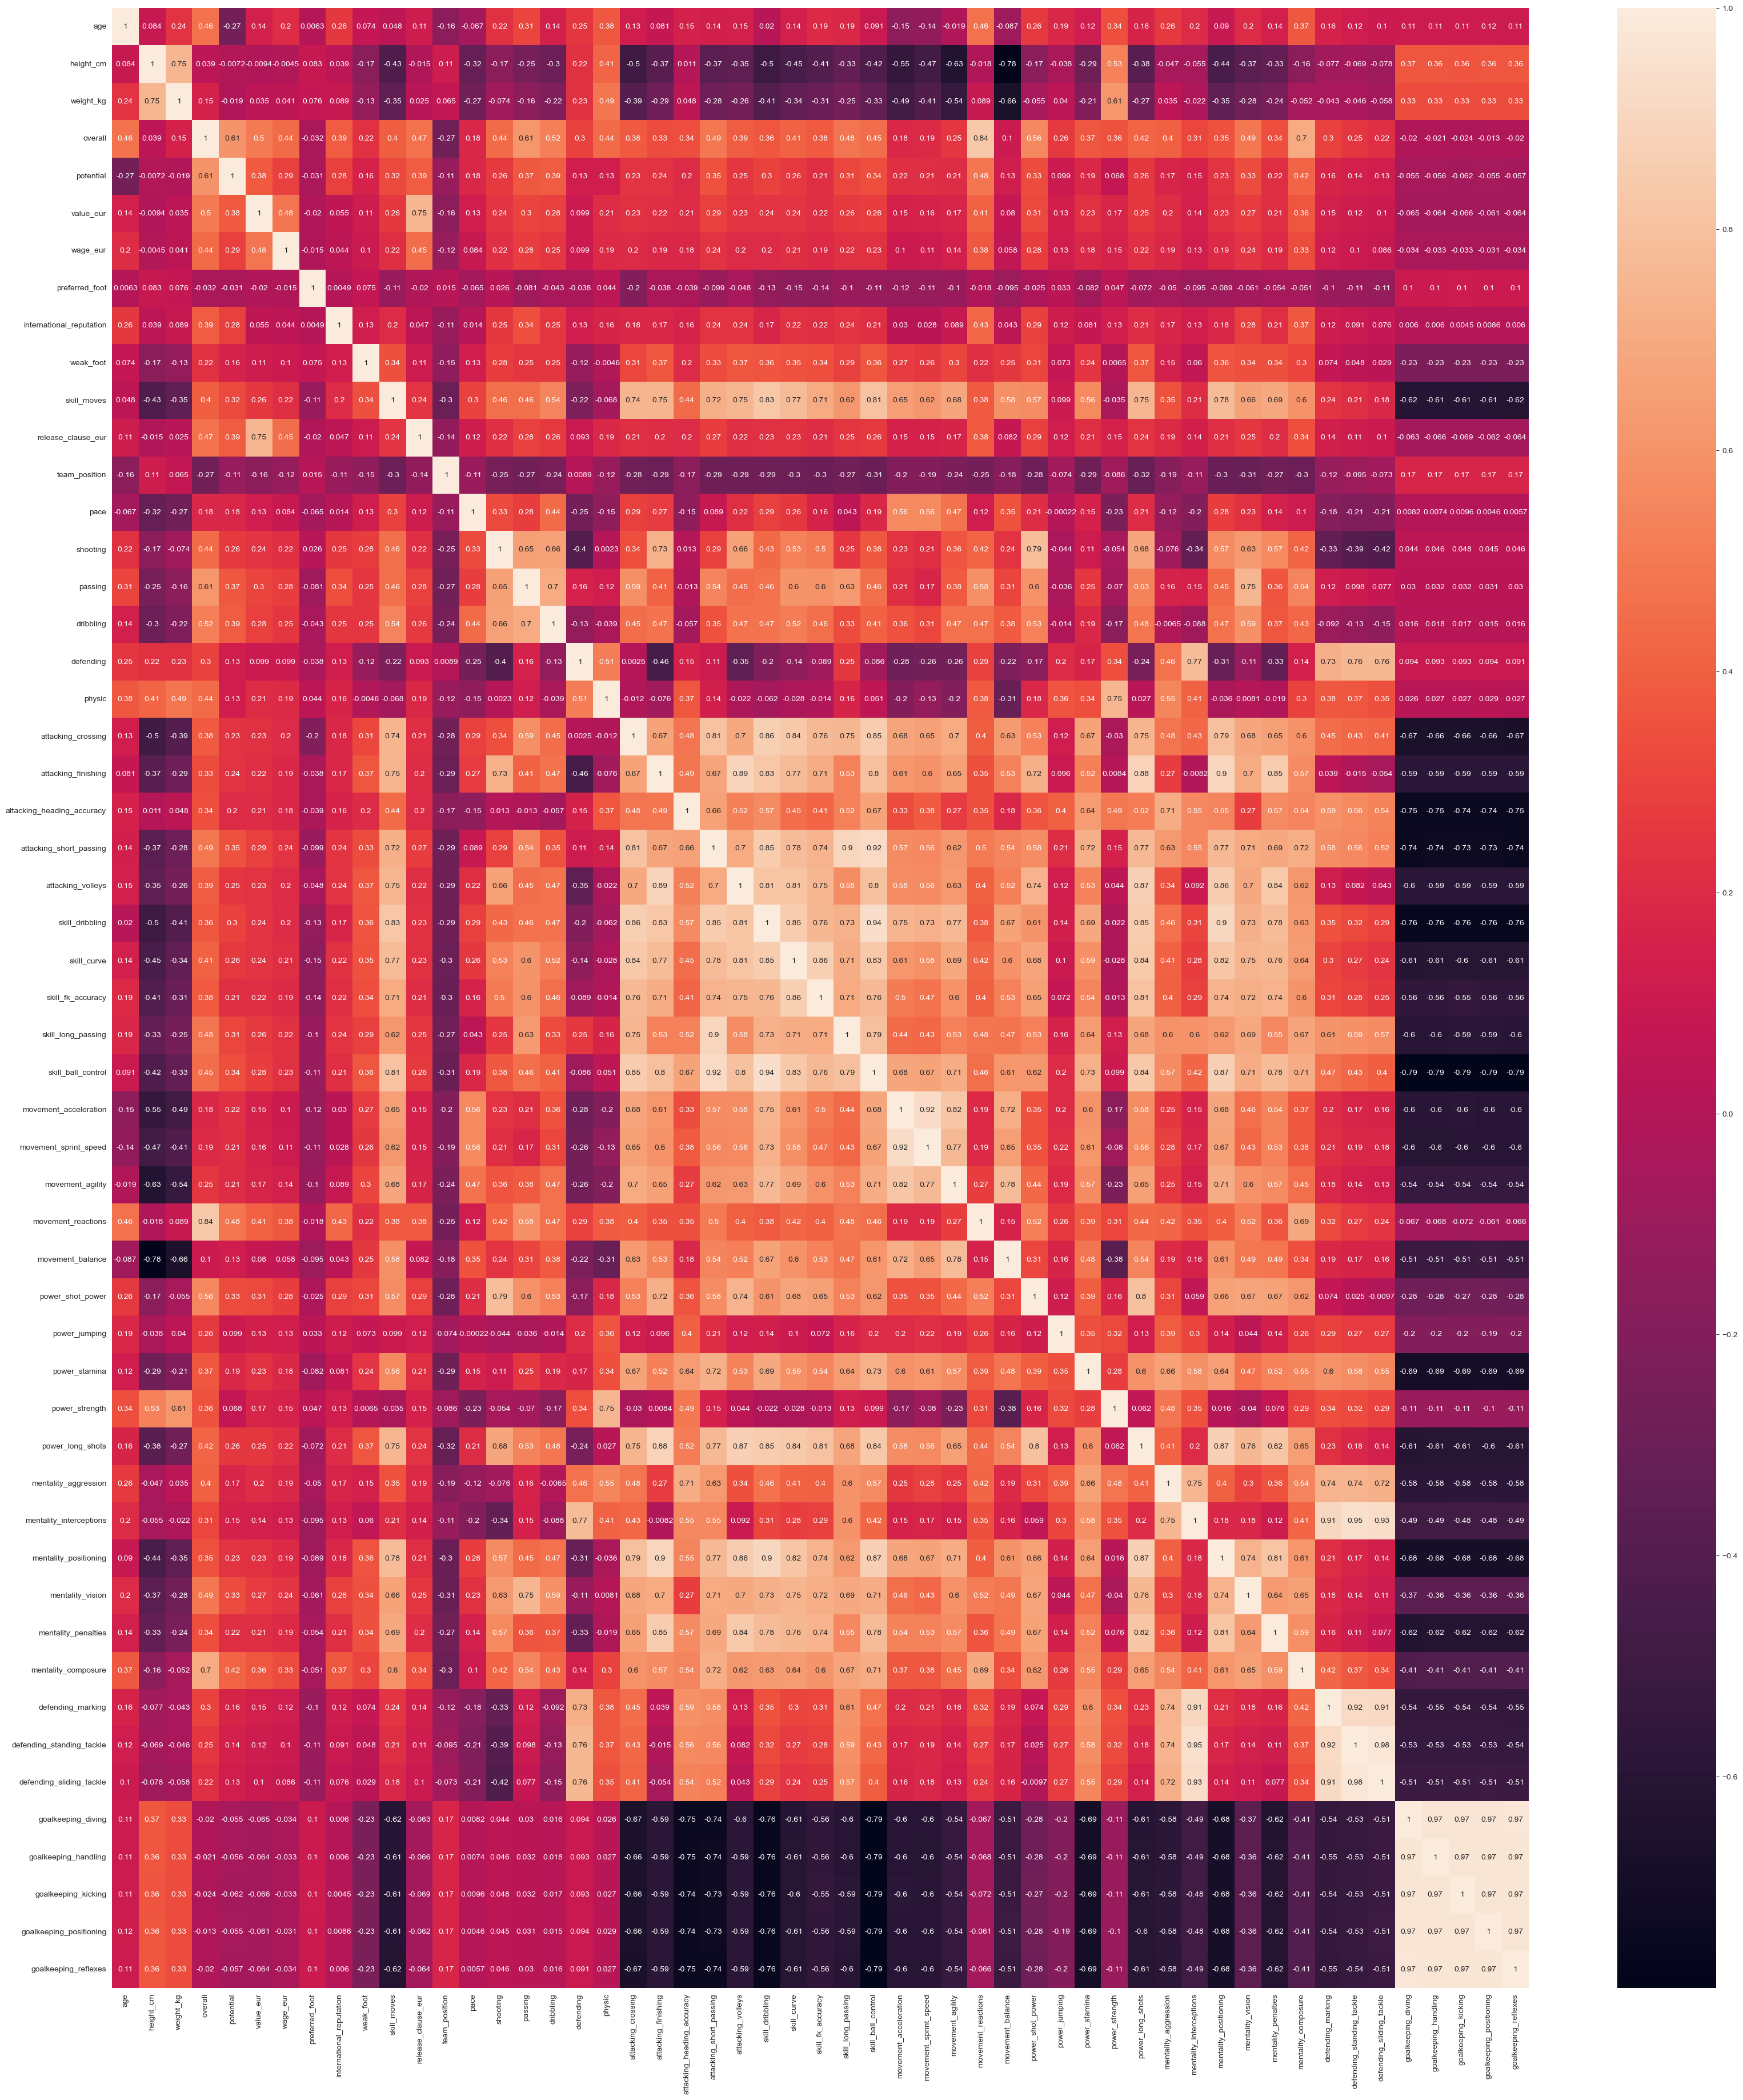

In [102]:
# Plot hitmap for better visualisation
plt.figure(figsize=(40,45))
sns.heatmap(fifa.corr(),annot=True)
plt.show()

In [112]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = fifa.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0   defending_standing_tackle   defending_sliding_tackle  0.975808
1    defending_sliding_tackle  defending_standing_tackle  0.975808
2          goalkeeping_diving       goalkeeping_reflexes  0.973922
3        goalkeeping_reflexes         goalkeeping_diving  0.973922
4          goalkeeping_diving       goalkeeping_handling  0.971330
5        goalkeeping_handling         goalkeeping_diving  0.971330
6        goalkeeping_handling       goalkeeping_reflexes  0.971244
7        goalkeeping_reflexes       goalkeeping_handling  0.971244
8          goalkeeping_diving    goalkeeping_positioning  0.971218
9     goalkeeping_positioning         goalkeeping_diving  0.971218
10       goalkeeping_reflexes    goalkeeping_positioning  0.971060
11    goalkeeping_positioning       goalkeeping_reflexes  0.971060
12    goalkeeping_positioning       goalkeeping_handling  0.970517
13       goalkeeping_handling    goalkeeping_positioning  0.970517
14       goalkeeping_reflexes        goalkeeping_kicking  0.967866
15        goalkeeping_kicking       goalkeeping_reflexes  0.967866
16        goalkeeping_kicking         goalkeeping_diving  0.967057
17         goalkeeping_diving        goalkeeping_kicking  0.967057
18       goalkeeping_handling        goalkeeping_kicking  0.966508
19        goalkeeping_kicking       goalkeeping_handling  0.966508
20    goalkeeping_positioning        goalkeeping_kicking  0.966061
21        goalkeeping_kicking    goalkeeping_positioning  0.966061
22    mentality_interceptions  defending_standing_tackle  0.945287
23  defending_standing_tackle    mentality_interceptions  0.945287
24         skill_ball_control            skill_dribbling  0.943461
25            skill_dribbling         skill_ball_control  0.943461
26    mentality_interceptions   defending_sliding_tackle  0.933894
27   defending_sliding_tackle    mentality_interceptions  0.933894
28      movement_sprint_speed      movement_acceleration  0.923721
29      movement_acceleration      movement_sprint_speed  0.923721
30          defending_marking  defending_standing_tackle  0.918593
31  defending_standing_tackle          defending_marking  0.918593
32    attacking_short_passing         skill_ball_control  0.917721
33         skill_ball_control    attacking_short_passing  0.917721
34          defending_marking   defending_sliding_tackle  0.909153
35   defending_sliding_tackle          defending_marking  0.909153
36          defending_marking    mentality_interceptions  0.907401
37    mentality_interceptions          defending_marking  0.907401
38      mentality_positioning            skill_dribbling  0.904501
39            skill_dribbling      mentality_positioning  0.904501

In [114]:
fifa.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

#### 6.7 PCA

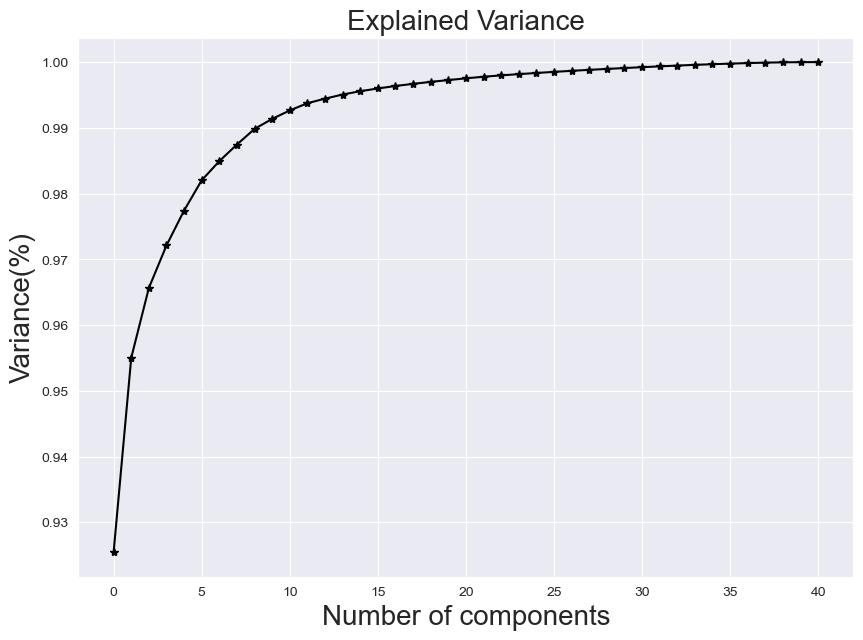

In [117]:

from sklearn.decomposition import PCA
pca = PCA() 
principlecomponents = pca.fit_transform(fifa) 
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') 
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) 
plt.title('Explained Variance',fontsize=20)
plt.show()



In [119]:

pca = PCA(n_components=10)
fifa_1 = pca.fit_transform(fifa)


principle_df = pd.DataFrame(data=fifa_1,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.457710  1.962726 -0.132601  1.200699  0.269113  2.528723  2.280922   
1  14.495288  2.522625 -0.105140  1.463562  1.292367  1.976024  2.091293   
2   8.525355  3.355487 -0.944310  0.942269  1.112964  2.115174  2.407468   
3  -1.791729 -1.370113 -0.821606  0.949437  0.670873  1.558691  0.898559   
4  14.441877  1.775785 -0.375451  0.749838  0.949525  1.572728  1.714708   

       pca8      pca9     pca10  
0 -0.145919  0.478266 -0.309728  
1  0.724810  0.772630 -0.383591  
2  0.504054  0.467037 -0.130026  
3  0.018915 -0.177006 -0.250844  
4 -0.062866  0.468555 -0.166164

# 7. Cluster Models

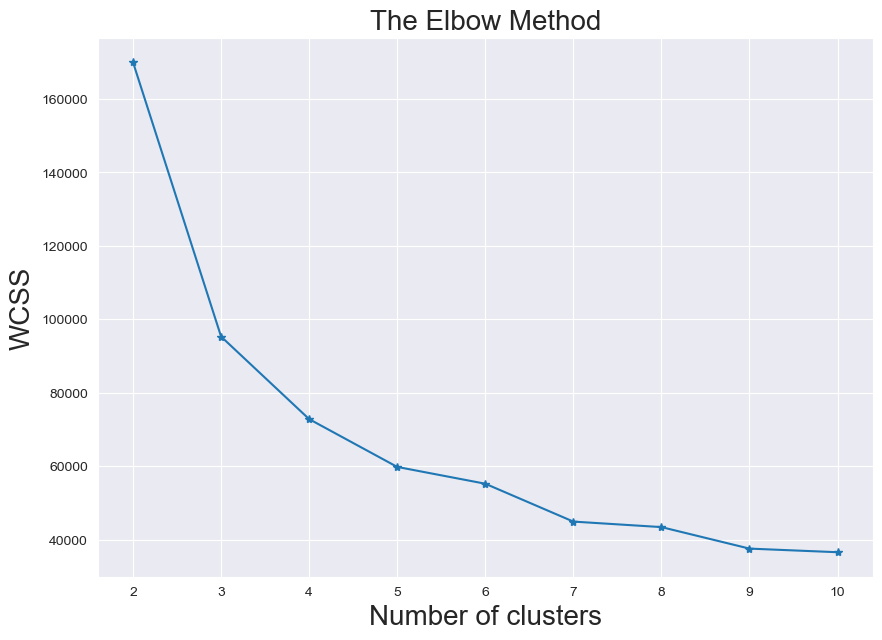

In [121]:

from sklearn.cluster import KMeans
kmeans = KMeans() 
wcss = [] 

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(fifa_1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()


In [123]:

kmeans = KMeans(n_clusters=2,random_state=45)


kmeans.fit(fifa_1)

kmeans.labels_


principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.457710  1.962726 -0.132601  1.200699  0.269113  2.528723  2.280922   
1  14.495288  2.522625 -0.105140  1.463562  1.292367  1.976024  2.091293   
2   8.525355  3.355487 -0.944310  0.942269  1.112964  2.115174  2.407468   
3  -1.791729 -1.370113 -0.821606  0.949437  0.670873  1.558691  0.898559   
4  14.441877  1.775785 -0.375451  0.749838  0.949525  1.572728  1.714708   

       pca8      pca9     pca10  cluster  
0 -0.145919  0.478266 -0.309728        1  
1  0.724810  0.772630 -0.383591        1  
2  0.504054  0.467037 -0.130026        1  
3  0.018915 -0.177006 -0.250844        0  
4 -0.062866  0.468555 -0.166164        1

In [125]:

kmeans.cluster_centers_

array([[-2.46069897e+00, -3.47640646e-02,  1.47679612e-03,
         1.44392945e-02, -9.55671330e-03, -1.82180333e-03,
         3.59133334e-04,  4.93795650e-03,  3.55489972e-03,
        -7.31357002e-03],
       [ 9.69515393e+00,  1.36970415e-01, -5.81857672e-03,
        -5.68908205e-02,  3.76534504e-02,  7.17790513e-03,
        -1.41498534e-03, -1.94555486e-02, -1.40063049e-02,
         2.88154659e-02]])

In [131]:

labels = kmeans.labels_
labels


from sklearn.metrics import silhouette_score
silhou_score_2 = silhouette_score(fifa_1,labels)
print("Silhouette Score:",silhou_score_2)

Silhouette Score: 0.6864467935261777


In [133]:
kmeans = KMeans(n_clusters=3,random_state=45)

kmeans.fit(fifa_1)

kmeans.labels_

principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.457710  1.962726 -0.132601  1.200699  0.269113  2.528723  2.280922   
1  14.495288  2.522625 -0.105140  1.463562  1.292367  1.976024  2.091293   
2   8.525355  3.355487 -0.944310  0.942269  1.112964  2.115174  2.407468   
3  -1.791729 -1.370113 -0.821606  0.949437  0.670873  1.558691  0.898559   
4  14.441877  1.775785 -0.375451  0.749838  0.949525  1.572728  1.714708   

       pca8      pca9     pca10  cluster  
0 -0.145919  0.478266 -0.309728        1  
1  0.724810  0.772630 -0.383591        1  
2  0.504054  0.467037 -0.130026        2  
3  0.018915 -0.177006 -0.250844        0  
4 -0.062866  0.468555 -0.166164        1

In [135]:
kmeans.cluster_centers_

array([[-3.03272136e+00, -6.95462931e-02, -1.11623624e-02,
         5.24611849e-04,  4.01991949e-03,  2.60305497e-03,
         3.76922674e-03,  1.26904552e-02,  7.51455814e-03,
        -3.41503773e-03],
       [ 1.41436052e+01, -2.42165542e-01, -3.40940365e-02,
        -4.19203142e-02,  3.40368641e-02,  1.13061461e-02,
         1.04051772e-02,  2.17705810e-02,  6.73183403e-02,
        -2.58467842e-02],
       [ 4.75539343e+00,  3.39458003e-01,  5.25421671e-02,
         1.52319950e-02, -2.77716439e-02, -1.36175090e-02,
        -1.72916439e-02, -5.28245802e-02, -5.34160563e-02,
         2.23447983e-02]])

In [137]:
labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score
silhou_score_3 = silhouette_score(fifa_1,labels)
print("Silhouette Score:",silhou_score_3)

Silhouette Score: 0.6165442208238028


In [139]:
kmeans = KMeans(n_clusters=4,random_state=45)

kmeans.fit(fifa_1)

kmeans.labels_

principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.457710  1.962726 -0.132601  1.200699  0.269113  2.528723  2.280922   
1  14.495288  2.522625 -0.105140  1.463562  1.292367  1.976024  2.091293   
2   8.525355  3.355487 -0.944310  0.942269  1.112964  2.115174  2.407468   
3  -1.791729 -1.370113 -0.821606  0.949437  0.670873  1.558691  0.898559   
4  14.441877  1.775785 -0.375451  0.749838  0.949525  1.572728  1.714708   

       pca8      pca9     pca10  cluster  
0 -0.145919  0.478266 -0.309728        1  
1  0.724810  0.772630 -0.383591        1  
2  0.504054  0.467037 -0.130026        2  
3  0.018915 -0.177006 -0.250844        0  
4 -0.062866  0.468555 -0.166164        1

In [141]:
kmeans.cluster_centers_

array([[-3.20931571e+00, -4.96992173e-02, -1.44863453e-02,
        -2.93468737e-02,  2.01704944e-02,  1.29935960e-02,
         3.90911371e-03,  7.01477757e-03,  4.22213846e-03,
        -1.04776677e-03],
       [ 1.61955098e+01, -3.81346215e-01,  2.94457299e-03,
        -6.11877091e-02, -8.44071981e-03, -3.08244456e-03,
         8.83153624e-02,  4.46770959e-02, -1.01928821e-02,
        -6.44134102e-03],
       [ 8.78174736e+00,  2.72217229e-01, -1.46568712e-02,
        -1.33095774e-01,  6.48202594e-02,  4.21634755e-02,
        -4.49123322e-02, -1.52478708e-02,  9.19427478e-03,
         7.68264635e-03],
       [ 2.51672659e+00,  1.35337541e-01,  6.70615313e-02,
         2.22517729e-01, -1.20902383e-01, -7.88358185e-02,
        -1.24465131e-02, -3.14548703e-02, -2.00098670e-02,
         1.12602303e-03]])

In [143]:
labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score
silhou_score_4 = silhouette_score(fifa_1,labels)
print("Silhouette Score:",silhou_score_4)

Silhouette Score: 0.5508415296176953


In [145]:
kmeans = KMeans(n_clusters=5,random_state=45)

kmeans.fit(fifa_1)

kmeans.labels_

principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.457710  1.962726 -0.132601  1.200699  0.269113  2.528723  2.280922   
1  14.495288  2.522625 -0.105140  1.463562  1.292367  1.976024  2.091293   
2   8.525355  3.355487 -0.944310  0.942269  1.112964  2.115174  2.407468   
3  -1.791729 -1.370113 -0.821606  0.949437  0.670873  1.558691  0.898559   
4  14.441877  1.775785 -0.375451  0.749838  0.949525  1.572728  1.714708   

       pca8      pca9     pca10  cluster  
0 -0.145919  0.478266 -0.309728        1  
1  0.724810  0.772630 -0.383591        1  
2  0.504054  0.467037 -0.130026        2  
3  0.018915 -0.177006 -0.250844        4  
4 -0.062866  0.468555 -0.166164        1

In [147]:
kmeans.cluster_centers_

array([[-3.45687165e+00,  4.04327228e-01,  4.18721283e-02,
        -5.72948712e-02, -2.37528763e-02, -6.41592005e-02,
         2.94804583e-02, -3.48592832e-02,  4.39496901e-02,
        -1.67923128e-02],
       [ 1.61955098e+01, -3.81346215e-01,  2.94457299e-03,
        -6.11877091e-02, -8.44071981e-03, -3.08244456e-03,
         8.83153624e-02,  4.46770959e-02, -1.01928821e-02,
        -6.44134102e-03],
       [ 8.78174736e+00,  2.72217229e-01, -1.46568712e-02,
        -1.33095774e-01,  6.48202594e-02,  4.21634755e-02,
        -4.49123322e-02, -1.52478708e-02,  9.19427478e-03,
         7.68264635e-03],
       [ 2.51672659e+00,  1.35337541e-01,  6.70615313e-02,
         2.22517729e-01, -1.20902383e-01, -7.88358185e-02,
        -1.24465131e-02, -3.14548703e-02, -2.00098670e-02,
         1.12602303e-03],
       [-2.48769645e+00, -1.37317478e+00, -1.78769866e-01,
         5.21208295e-02,  1.48206005e-01,  2.37892040e-01,
        -7.06307068e-02,  1.29076602e-01, -1.11582666e-01,
         4.

In [149]:
labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score
silhou_score_5 = silhouette_score(fifa_1,labels)
print("Silhouette Score:",silhou_score_5)

Silhouette Score: 0.34816881498763874


# 8.Model Comparison Report

The silhouette score is a key metric used to evaluate the quality of clustering. A higher silhouette score indicates that clusters are well-separated and well-formed, while a lower score suggests overlapping or poorly defined clusters. This report analyzes silhouette scores for different numbers of clusters (k = 2 to 5).

#### Results
* k = 2: Silhouette Score = 0.68

* k = 3, Silhouette Score = 0.61

* k = 4, Silhouette Score = 0.55

* k = 5, Silhouette Score = 0.34 0.34

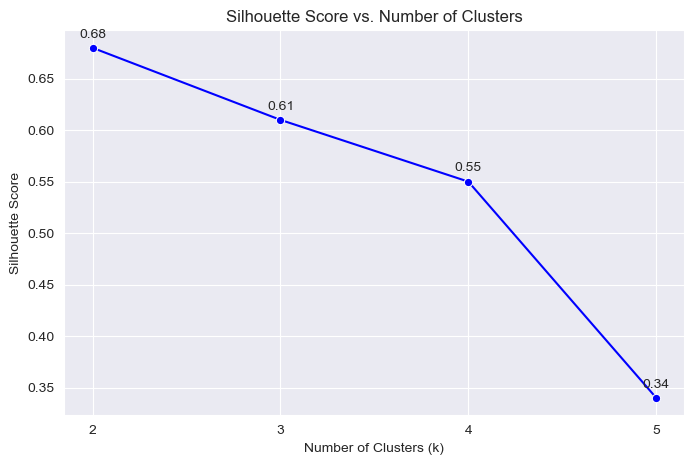

In [151]:
num_clusters = [2, 3, 4, 5]
silhou_score = [0.68,0.61,0.55,0.34]

plt.figure(figsize=(8, 5))
sns.lineplot(x=num_clusters, y=silhou_score, marker='o', linestyle='-', color='b')

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")


for i, score in zip(num_clusters, silhou_score):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontsize=10)

plt.xticks(num_clusters)
plt.grid(True)
plt.show()

 The silhouette scores show a decreasing trend as the number of clusters increases. The highest score is observed at k = 2, indicating that two clusters provide the most distinct separation in the data. As the number of clusters increases, the silhouette score decreases, with a sharp decline at k = 5, suggesting that five clusters might not offer well-defined or well-separated groupings.

# 8. Challenges



* The FIFA 20 dataset contained missing values in several columns.

* The dataset had a large number of numerical features, making it challenging to select relevant ones.

* Outlier Detection and Treatment

* Selecting the optimal number of clusters (K) for K-Means was challenging.However, the choice of K was still subjective and required testing.

* Scaling and Standardization Issues as K-Means clustering is sensitive to different feature scales.

* Model Evaluation Challengesd as Unlike supervised learning, clustering has no ground truth labels for direct accuracy measurement.




# 9. Conclusion

Based on the silhouette scores, the optimal number of clusters is k = 2, as it provides the best clustering quality. The drop in the silhouette score at higher values of k, especially at k = 5, indicates that increasing the number of clusters further leads to less effective clustering. 